Accessing only ITC data till 2024 -> March 31st, 2024

In [3]:
import pandas as pd


In [4]:
itc_df = pd.read_csv("ITC_2024.csv")

In [5]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [6]:
itc_df.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades'],
      dtype='object')

| Column         | Description                                                  | Usage Ideas                                 |
| -------------- | ------------------------------------------------------------ | ------------------------------------------- |
| `date`         | Trading date                                                 | Index for time series, plotting, resampling |
| `series`       | Usually indicates the type of security (e.g., EQ for equity) | Filter for just equity if needed            |
| `open`         | Opening price of the day                                     | Calculate gaps, day range                   |
| `high`         | Highest price during the day                                 | Identify resistance                         |
| `low`          | Lowest price during the day                                  | Identify support                            |
| `prev._close`  | Previous day closing price                                   | Calculate returns or price changes          |
| `ltp`          | Last traded price                                            | Useful for intraday or real-time analysis   |
| `close`        | Closing price of the day                                     | Core price for indicators and forecasting   |
| `vwap`         | Volume Weighted Average Price                                | Useful for volume-based trading strategies  |
| `52w_h`        | 52-week high price                                           | Useful for breakout strategies              |
| `52w_l`        | 52-week low price                                            | Useful for support identification           |
| `volume`       | Number of shares traded                                      | Analyze liquidity, volume spikes            |
| `value`        | Total value traded (price \* volume)                         | Confirmation of volume moves                |
| `no_of_trades` | Number of trades executed                                    | Market activity indicator                   |


In [7]:
import pandas as pd

# Convert 'date' to datetime and sort
itc_df['date'] = pd.to_datetime(itc_df['date'])
itc_df = itc_df.sort_values('date').reset_index(drop=True)

# If needed, filter for series 'EQ' (equity)
itc_df = itc_df[itc_df['series'] == 'EQ']

# Set date as index
itc_df.set_index('date', inplace=True)


In [8]:
# Simple Moving Averages
itc_df['SMA_20'] = itc_df['close'].rolling(window=20).mean()
itc_df['SMA_50'] = itc_df['close'].rolling(window=50).mean()

# RSI Calculation
delta = itc_df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
itc_df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
itc_df['stddev'] = itc_df['close'].rolling(window=20).std()
itc_df['BB_upper'] = itc_df['SMA_20'] + (2 * itc_df['stddev'])
itc_df['BB_lower'] = itc_df['SMA_20'] - (2 * itc_df['stddev'])


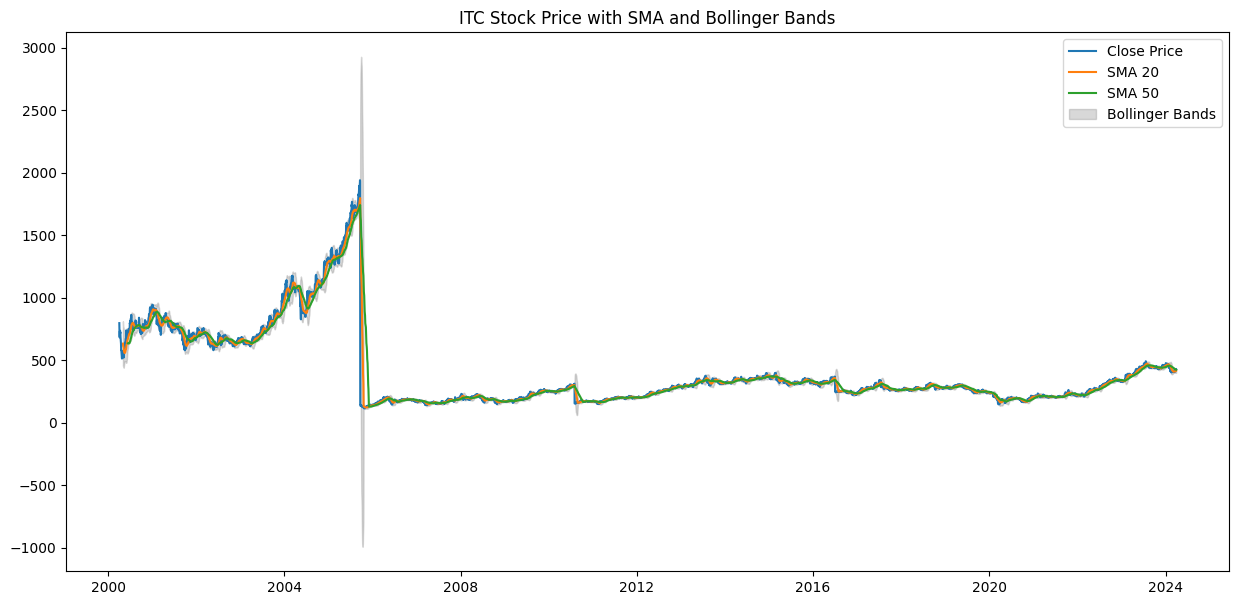

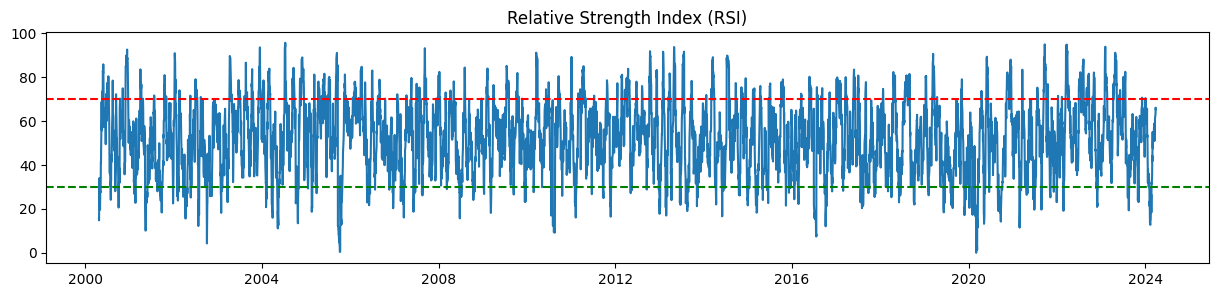

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(itc_df.index, itc_df['close'], label='Close Price')
plt.plot(itc_df.index, itc_df['SMA_20'], label='SMA 20')
plt.plot(itc_df.index, itc_df['SMA_50'], label='SMA 50')
plt.fill_between(itc_df.index, itc_df['BB_lower'], itc_df['BB_upper'], color='grey', alpha=0.3, label='Bollinger Bands')
plt.legend()
plt.title('ITC Stock Price with SMA and Bollinger Bands')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(itc_df.index, itc_df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.show()


           series    open    high     low  prev._close     ltp   close  \
date                                                                     
2023-09-28     EQ  449.95  449.95  439.60       449.15  441.15  440.75   
2023-09-29     EQ  442.00  445.60  439.20       440.75  443.50  444.40   
2023-10-03     EQ  441.00  442.90  439.25       444.40  439.65  439.75   
2023-10-04     EQ  439.75  441.70  433.30       439.75  435.35  436.10   
2023-10-05     EQ  440.00  440.50  435.05       436.10  436.60  436.05   

              vwap  52w_h   52w_l    volume         value  no_of_trades  \
date                                                                      
2023-09-28  442.49  499.7  323.25  10216736  4.520850e+09      155680.0   
2023-09-29  443.32  499.7  323.25   8160058  3.617551e+09      138714.0   
2023-10-03  440.62  499.7  323.25   7481883  3.296673e+09      186900.0   
2023-10-04  437.58  499.7  323.25  13396709  5.862144e+09      219368.0   
2023-10-05  437.31  499.7  323.

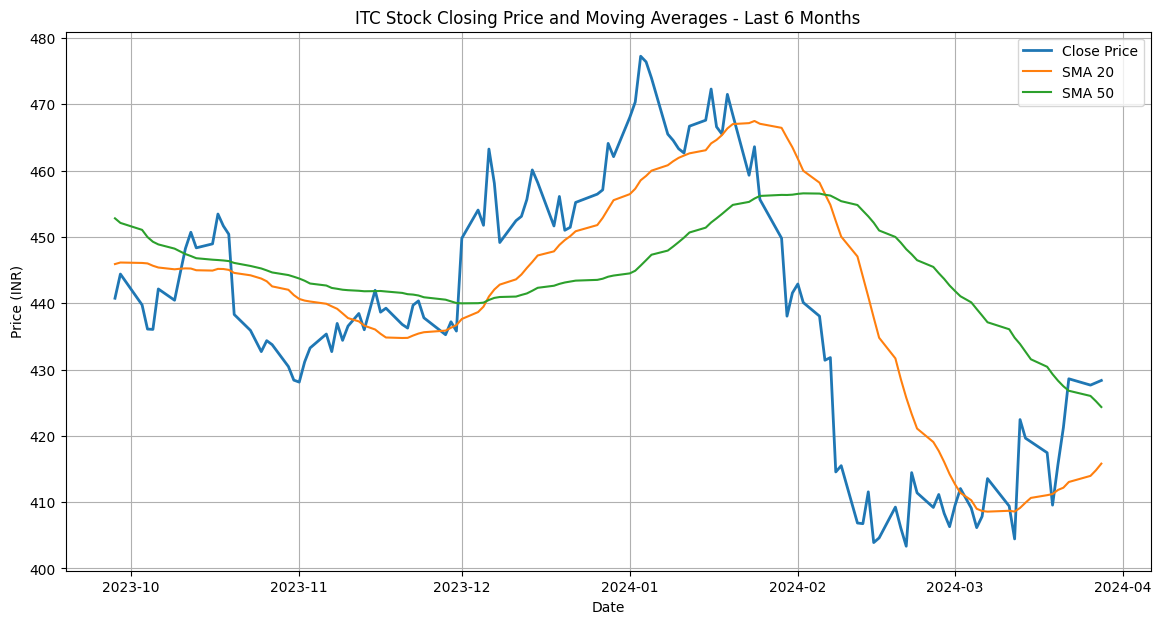

In [10]:


# Get the latest date in your DataFrame
latest_date = itc_df.index.max()

# Calculate the date 6 months ago
six_months_ago = latest_date - pd.DateOffset(months=6)

# Filter the DataFrame for the last 6 months
last_6_months_df = itc_df[itc_df.index >= six_months_ago]

# Now you can use last_6_months_df for plotting or analysis
print(last_6_months_df.head())


plt.figure(figsize=(14, 7))
plt.plot(last_6_months_df.index, last_6_months_df['close'], label='Close Price', linewidth=2)
plt.plot(last_6_months_df.index, last_6_months_df['SMA_20'], label='SMA 20', linewidth=1.5)
plt.plot(last_6_months_df.index, last_6_months_df['SMA_50'], label='SMA 50', linewidth=1.5)

plt.title('ITC Stock Closing Price and Moving Averages - Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
last_6_months_df

,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades,SMA_20,SMA_50,RSI,stddev,BB_upper,BB_lower
date,,,,,,,,,,,,,,,,,,,
2023-09-28,EQ,449.95,449.95,439.60,449.15,441.15,440.75,442.49,499.7,323.25,10216736,4.520850e+09,155680.0,445.9025,452.801,44.792720,4.704686,455.311872,436.493128
2023-09-29,EQ,442.00,445.60,439.20,440.75,443.50,444.40,443.32,499.7,323.25,8160058,3.617551e+09,138714.0,446.1375,452.112,51.755266,4.491099,455.119697,437.155303
2023-10-03,EQ,441.00,442.90,439.25,444.40,439.65,439.75,440.62,499.7,323.25,7481883,3.296673e+09,186900.0,446.0725,451.064,42.542543,4.577188,455.226876,436.918124
2023-10-04,EQ,439.75,441.70,433.30,439.75,435.35,436.10,437.58,499.7,323.25,13396709,5.862144e+09,219368.0,446.0025,449.977,34.843907,4.723554,455.449609,436.555391
2023-10-05,EQ,440.00,440.50,435.05,436.10,436.60,436.05,437.31,499.7,323.25,10030257,4.386356e+09,194053.0,445.6500,449.271,31.573390,5.191440,456.032881,435.267119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0,412.1775,427.477,58.697261,5.330337,422.838174,401.516826
2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0,413.0375,426.796,61.437457,6.465045,425.967590,400.107410
2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0,413.9600,426.015,63.184080,7.166876,428.293751,399.626249


In [12]:
latest_date

Timestamp('2024-03-28 00:00:00')

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Sort the dataframe by date to be safe
last_6_months_df = last_6_months_df.sort_values('date').reset_index(drop=True)

# Create lag features (previous 5 days closing prices)
for lag in range(1, 6):
    last_6_months_df[f'lag_{lag}'] = last_6_months_df['close'].shift(lag)

# Drop rows with NaN created by lagging
last_6_months_df = last_6_months_df.dropna().reset_index(drop=True)

# Define feature columns
feature_cols = [f'lag_{lag}' for lag in range(1, 6)]

# Features and target
X = last_6_months_df[feature_cols]
y = last_6_months_df['close']

# Train on all except last row
X_train = X[:-1]
y_train = y[:-1]

# Use last row's features to predict next day price
X_pred = X.iloc[-1:].values

# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict next day price
next_day_price_pred = rf.predict(X_pred)

print(f"Predicted next day closing price: {next_day_price_pred[0]:.2f}")


Predicted next day closing price: 428.62


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
